In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('seattle-weather.csv')

In [5]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='precipitation'>

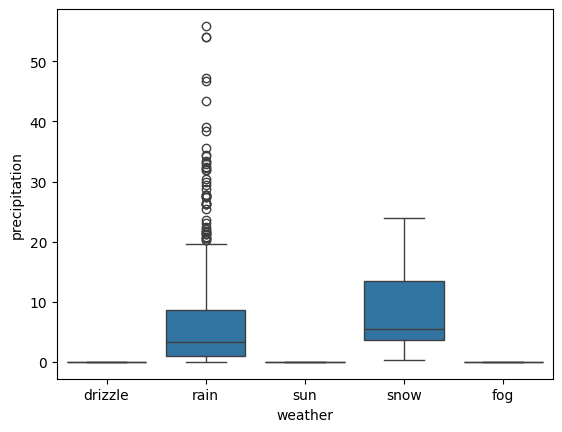

In [10]:
sns.boxplot(x=df.weather, y=df.precipitation)

<Axes: xlabel='weather', ylabel='temp_min'>

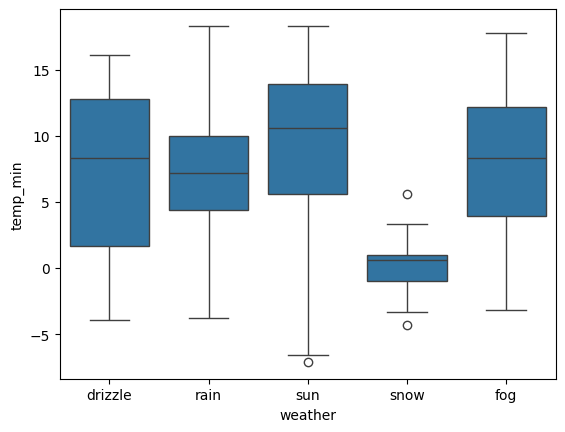

In [12]:
sns.boxplot(x=df.weather, y=df.temp_min)

<Axes: xlabel='temp_max', ylabel='Count'>

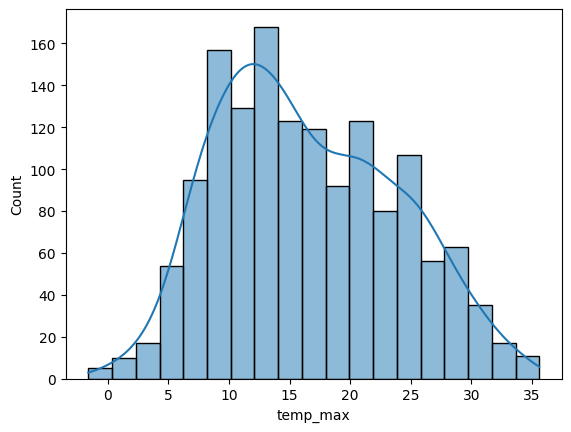

In [20]:
sns.histplot(x=df.temp_max, kde=True)

<Axes: xlabel='temp_min', ylabel='Count'>

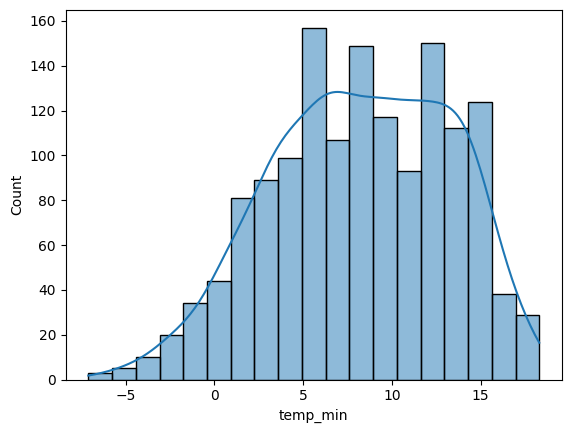

In [21]:
sns.histplot(x=df.temp_min, kde=True)

In [23]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [24]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


In [27]:
df.drop(columns=['date'],axis=1,inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,10.9,10.6,2.8,4.5,rain,2,1,2012
2,0.8,11.7,7.2,2.3,rain,3,1,2012
3,20.3,12.2,5.6,4.7,rain,4,1,2012
4,1.3,8.9,2.8,6.1,rain,5,1,2012


<Axes: xlabel='weather', ylabel='wind'>

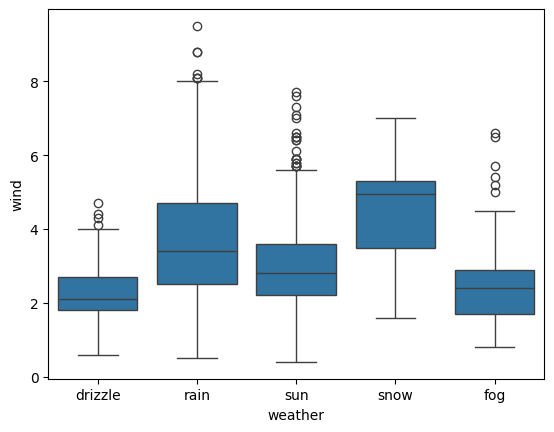

In [28]:
sns.boxplot(x=df.weather, y=df.wind)

<Axes: xlabel='wind', ylabel='Count'>

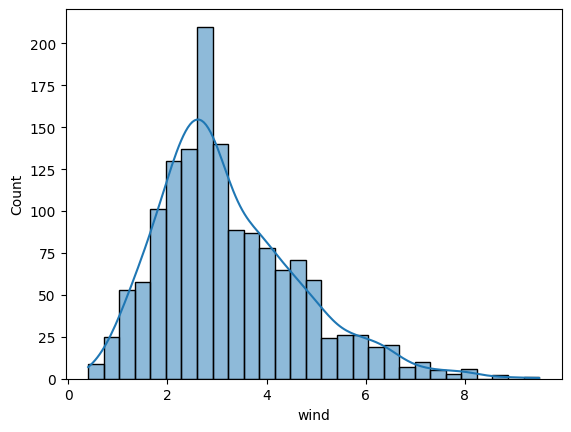

In [29]:
sns.histplot(x=df.wind, kde=True)

<Axes: >

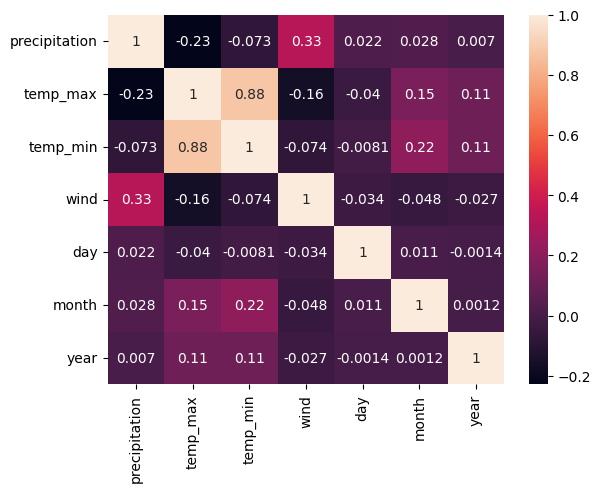

In [36]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [37]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,10.9,10.6,2.8,4.5,rain,2,1,2012
2,0.8,11.7,7.2,2.3,rain,3,1,2012
3,20.3,12.2,5.6,4.7,rain,4,1,2012
4,1.3,8.9,2.8,6.1,rain,5,1,2012


In [58]:
X = df.drop(columns=['weather'], axis=1)
y = df['weather']

In [59]:
X

,precipitation,temp_max,temp_min,wind,day,month,year
0,0.0,12.8,5.0,4.7,1,1,2012
1,10.9,10.6,2.8,4.5,2,1,2012
2,0.8,11.7,7.2,2.3,3,1,2012
3,20.3,12.2,5.6,4.7,4,1,2012
4,1.3,8.9,2.8,6.1,5,1,2012
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015
1457,1.5,5.0,1.7,1.3,28,12,2015
1458,0.0,7.2,0.6,2.6,29,12,2015
1459,0.0,5.6,-1.0,3.4,30,12,2015


In [60]:
X = X.astype(int)

In [61]:
X.head()

,precipitation,temp_max,temp_min,wind,day,month,year
0,0,12,5,4,1,1,2012
1,10,10,2,4,2,1,2012
2,0,11,7,2,3,1,2012
3,20,12,5,4,4,1,2012
4,1,8,2,6,5,1,2012


In [74]:
X_encode = df.drop(columns=['weather'], axis=1)
y_encode = df['weather']

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ['precipitation', 'temp_max', 'temp_min', 'wind', 'day','month', 'year']
X[cols] = scaler.fit_transform(X[cols])

In [73]:
X.head()

,precipitation,temp_max,temp_min,wind,day,month,year
0,-0.434197,-0.545602,-0.575860,0.819270,-1.673805,-1.601451,-1.340356
1,1.087784,-0.818030,-1.182299,0.819270,-1.560170,-1.601451,-1.340356
2,-0.434197,-0.681816,-0.171568,-0.543227,-1.446535,-1.601451,-1.340356
3,2.609764,-0.545602,-0.575860,0.819270,-1.332899,-1.601451,-1.340356
4,-0.281999,-1.090459,-1.182299,2.181768,-1.219264,-1.601451,-1.340356


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
train_test_split

<Axes: xlabel='precipitation', ylabel='Count'>

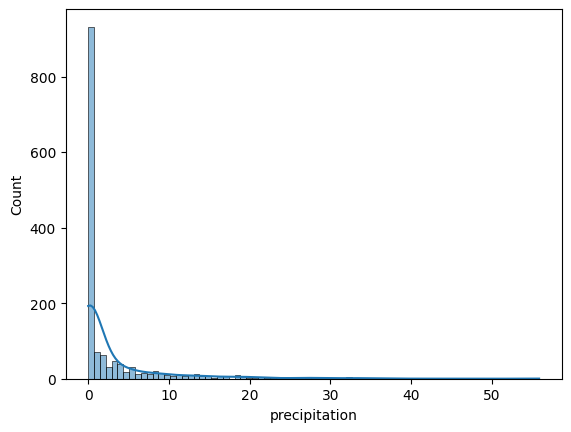

In [75]:
sns.histplot(df.precipitation, kde=True)